# Main

In [1]:
from graph import *
from walk import *
import numpy as np
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## PageRank without count means: 
* `r_0 = [1 / nodes for i in range(nodes)]`
* `r[focus] += previous_r[i] / len(G[i])` for all in-nodes `i`

## PageRank with count means: 
* `r_0 = [0 for i in range(nodes)]`
* `r[focus] += 1`

## PageRank with teleport probability function:
$$\frac{1}{(1 + x*0.5)}$$
where x is the number of steps taken from the last time the walker was in the current position.

PageRank attempt #1


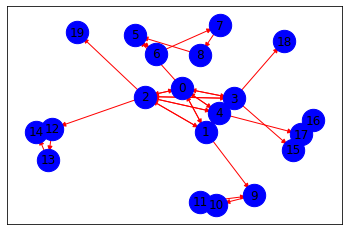

Mean square error between NetworkX PageRank & random walk: 0.0031415715581289737

Mean square error between NetworkX PageRank & random walk with count: 0.0010380717178646796



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RW pagerank,0.007686,0.005800,0.010359,0.005012,0.003232,0.249039,0.102601,0.127441,0.163577,0.090659,0.041695,0.060864,0.058978,0.030944,0.038646,0.000941,0.000993,0.000710,0.000095,0.000728
RW pagerank with count,0.047170,0.056604,0.094340,0.094340,0.037736,0.056604,0.075472,0.056604,0.056604,0.056604,0.056604,0.066038,0.056604,0.056604,0.056604,0.009434,0.009434,0.018868,0.009434,0.028302
NX pagerank,0.028616,0.024458,0.025065,0.025065,0.024458,0.069443,0.068172,0.067091,0.066172,0.071737,0.070122,0.068749,0.070164,0.068785,0.067613,0.073758,0.071840,0.013302,0.012695,0.012695


In [2]:
print('PageRank attempt #1')
G = graph()
eigen_vector = nx.pagerank(G)


r, history, r_c, history_c = walk(G, 'not_tanh')


norm_r = [float(i)/sum(r[:-1]) for i in r[:-1]]
norm_r_c = [float(i)/sum(r_c[:-1]) for i in r_c[:-1]]
nx_pagerank = [i for i in eigen_vector.values()]

mse = (np.square(np.array(norm_r) - np.array(nx_pagerank))).mean()
mse_c = (np.square(np.array(norm_r_c) - np.array(nx_pagerank))).mean()

print(f'Mean square error between NetworkX PageRank & random walk: {mse}\n')
print(f'Mean square error between NetworkX PageRank & random walk with count: {mse_c}\n')

pd.DataFrame([norm_r, norm_r_c, nx_pagerank], index=['RW pagerank', 'RW pagerank with count','NX pagerank' ])

In [3]:
print('PageRank history:')
pd.DataFrame(history)

PageRank history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
1,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,dead end
2,0.050000,0.050000,0.086667,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,
3,0.050000,0.050000,0.086667,0.092778,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,
4,0.050000,0.098241,0.086667,0.092778,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,
5,0.050000,0.098241,0.140111,0.092778,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,teleport
6,0.050000,0.098241,0.140111,0.154111,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,teleport
7,0.050000,0.098241,0.140111,0.154111,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.123352,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,
8,0.050000,0.098241,0.140111,0.154111,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.123352,0.173352,0.050000,0.050000,0.050000,0.050000,0.050000,0.058333,
9,0.050000,0.098241,0.140111,0.154111,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.123352,0.173352,0.223352,0.050000,0.050000,0.050000,0.050000,0.058333,


In [4]:
print('PageRank with count history:')
pd.DataFrame(history_c)

PageRank with count history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dead end
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,
5,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,teleport
6,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,teleport
7,0,1,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,
8,0,1,2,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,
9,0,1,2,2,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,


## PageRank with teleport probability function:
$$tanh(0.5x + 0.5)$$
where x is the number of steps taken from the last time the walker was in the current position.

PageRank attempt #2


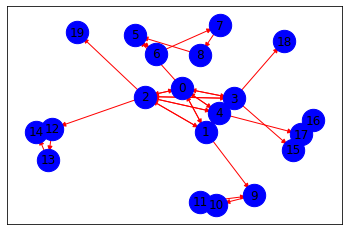

Mean square error between NetworkX PageRank & random walk: 0.0027002293396047776

Mean square error between NetworkX PageRank & random walk with count: 0.0006808539787954075



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RW pagerank,0.010175,0.014721,0.025757,0.010208,0.015622,0.203704,0.161274,0.187045,0.061517,0.038857,0.051874,0.014964,0.070845,0.015795,0.036578,0.044930,0.015795,0.005985,0.006689,0.007666
RW pagerank with count,0.025641,0.051282,0.076923,0.025641,0.025641,0.102564,0.051282,0.051282,0.076923,0.051282,0.076923,0.025641,0.076923,0.025641,0.051282,0.076923,0.025641,0.025641,0.025641,0.051282
NX pagerank,0.028616,0.024458,0.025065,0.025065,0.024458,0.069443,0.068172,0.067091,0.066172,0.071737,0.070122,0.068749,0.070164,0.068785,0.067613,0.073758,0.071840,0.013302,0.012695,0.012695


In [5]:
print('PageRank attempt #2')
G = graph()
eigen_vector = nx.pagerank(G)

# print(sorted(eigen_vector, key=eigen_vector.get, ))
# print(sorted(round(x,2) for x in eigen_vector.values()))


r, history, r_c, history_c = walk(G, 'tanh')

norm_r = [float(i)/sum(r[:-1]) for i in r[:-1]]
norm_r_c = [float(i)/sum(r_c[:-1]) for i in r_c[:-1]]
nx_pagerank = [i for i in eigen_vector.values()]

mse = (np.square(np.array(norm_r) - np.array(nx_pagerank))).mean()
mse_c = (np.square(np.array(norm_r_c) - np.array(nx_pagerank))).mean()

print(f'Mean square error between NetworkX PageRank & random walk: {mse}\n')
print(f'Mean square error between NetworkX PageRank & random walk with count: {mse_c}\n')

pd.DataFrame([norm_r, norm_r_c, nx_pagerank], index=['RW pagerank', 'RW pagerank with count','NX pagerank' ])

In [6]:
print('PageRank history:')
pd.DataFrame(history)

PageRank history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.050,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,
1,0.050,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.100000,0.050000,0.05,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,
2,0.050,0.050000,0.050000,0.050000,0.050000,0.158333,0.050000,0.050000,0.100000,0.050000,0.05,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,
3,0.050,0.050000,0.050000,0.050000,0.050000,0.158333,0.208333,0.050000,0.100000,0.050000,0.05,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,
4,0.050,0.050000,0.050000,0.050000,0.050000,0.158333,0.208333,0.258333,0.100000,0.050000,0.05,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,
5,0.050,0.050000,0.050000,0.050000,0.050000,0.158333,0.208333,0.258333,0.358333,0.050000,0.05,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,teleport
6,0.050,0.050000,0.050000,0.050000,0.050000,0.158333,0.208333,0.258333,0.616667,0.050000,0.05,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,
7,0.050,0.050000,0.050000,0.050000,0.050000,0.783333,0.208333,0.258333,0.616667,0.050000,0.05,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,teleport
8,0.050,0.050000,0.050000,0.050000,0.050000,0.783333,0.208333,0.258333,0.616667,0.050000,0.05,0.05,0.108333,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,
9,0.050,0.050000,0.050000,0.050000,0.050000,0.783333,0.208333,0.258333,0.616667,0.050000,0.05,0.05,0.108333,0.158333,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,


In [7]:
print('PageRank with count history:')
pd.DataFrame(history_c)

PageRank with count history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,
4,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,
5,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,teleport
6,0,0,0,0,0,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,
7,0,0,0,0,0,2,1,1,3,0,0,0,0,0,0,0,0,0,0,0,teleport
8,0,0,0,0,0,2,1,1,3,0,0,0,1,0,0,0,0,0,0,0,
9,0,0,0,0,0,2,1,1,3,0,0,0,1,1,0,0,0,0,0,0,


## PageRank with teleport probability function:
`If the previous node from the current position == the previous from the last time the walker was in the same current position:
    do_teleport()`

PageRank attempt #3


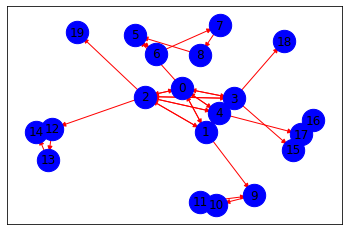

Mean square error between NetworkX PageRank & random walk: 0.013786242351502252

Mean square error between NetworkX PageRank & random walk with count: 0.0007773358979244439



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RW pagerank,0.000925,0.001399,0.001679,0.002142,0.000356,0.045730,0.118078,0.290826,0.496249,0.004019,0.000819,0.001982,0.014540,0.006956,0.009838,0.001958,0.001335,0.000111,0.000436,0.000623
RW pagerank with count,0.037975,0.063291,0.075949,0.050633,0.025316,0.063291,0.075949,0.088608,0.088608,0.050633,0.025316,0.037975,0.063291,0.050633,0.037975,0.037975,0.037975,0.012658,0.012658,0.063291
NX pagerank,0.028616,0.024458,0.025065,0.025065,0.024458,0.069443,0.068172,0.067091,0.066172,0.071737,0.070122,0.068749,0.070164,0.068785,0.067613,0.073758,0.071840,0.013302,0.012695,0.012695


In [8]:
print('PageRank attempt #3')
G = graph()
eigen_vector = nx.pagerank(G)

# print(sorted(eigen_vector, key=eigen_vector.get, ))
# print(sorted(round(x,2) for x in eigen_vector.values()))


r, history, r_c, history_c = walk(G, 'repeat')

norm_r = [float(i)/sum(r[:-1]) for i in r[:-1]]
norm_r_c = [float(i)/sum(r_c[:-1]) for i in r_c[:-1]]
nx_pagerank = [i for i in eigen_vector.values()]

mse = (np.square(np.array(norm_r) - np.array(nx_pagerank))).mean()
mse_c = (np.square(np.array(norm_r_c) - np.array(nx_pagerank))).mean()

print(f'Mean square error between NetworkX PageRank & random walk: {mse}\n')
print(f'Mean square error between NetworkX PageRank & random walk with count: {mse_c}\n')

pd.DataFrame([norm_r, norm_r_c, nx_pagerank], index=['RW pagerank', 'RW pagerank with count','NX pagerank' ])

In [9]:
print('PageRank history:')
pd.DataFrame(history)

PageRank history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.0500,0.0500,0.0500,0.0500,0.050000,0.050,0.050,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
1,0.050000,0.085000,0.050000,0.050000,0.050000,0.0500,0.0500,0.0500,0.0500,0.050000,0.050,0.050,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
2,0.102000,0.085000,0.050000,0.050000,0.050000,0.0500,0.0500,0.0500,0.0500,0.050000,0.050,0.050,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
3,0.102000,0.085000,0.050000,0.050000,0.100667,0.0500,0.0500,0.0500,0.0500,0.050000,0.050,0.050,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,
4,0.102000,0.085000,0.050000,0.050000,0.100667,0.0500,0.0500,0.0500,0.0500,0.050000,0.050,0.050,0.050000,0.050000,0.050000,0.050000,0.050000,0.070133,0.050000,0.050000,dead end
5,0.102000,0.085000,0.050000,0.050000,0.100667,0.0500,0.0500,0.0500,0.0500,0.117000,0.050,0.050,0.050000,0.050000,0.050000,0.050000,0.050000,0.070133,0.050000,0.050000,
6,0.102000,0.085000,0.050000,0.050000,0.100667,0.0500,0.0500,0.0500,0.0500,0.117000,0.167,0.050,0.050000,0.050000,0.050000,0.050000,0.050000,0.070133,0.050000,0.050000,
7,0.102000,0.085000,0.050000,0.050000,0.100667,0.0500,0.0500,0.0500,0.0500,0.117000,0.167,0.217,0.050000,0.050000,0.050000,0.050000,0.050000,0.070133,0.050000,0.050000,
8,0.102000,0.085000,0.050000,0.050000,0.100667,0.0500,0.0500,0.0500,0.0500,0.351000,0.167,0.217,0.050000,0.050000,0.050000,0.050000,0.050000,0.070133,0.050000,0.050000,
9,0.102000,0.085000,0.050000,0.050000,0.100667,0.0500,0.0500,0.0500,0.0500,0.351000,0.518,0.217,0.050000,0.050000,0.050000,0.050000,0.050000,0.070133,0.050000,0.050000,teleport


In [10]:
print('PageRank with count history:')
pd.DataFrame(history_c)

PageRank with count history:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,dead end
5,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,
6,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,
7,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,
8,1,1,0,0,1,0,0,0,0,2,1,1,0,0,0,0,0,1,0,0,
9,1,1,0,0,1,0,0,0,0,2,2,1,0,0,0,0,0,1,0,0,teleport
